In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/hades/projects/msci-wiki/plots':
  os.chdir(r'/hades/projects/msci-wiki/plots')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_38389/2352873013.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.11/importlib/_bootstrap.py": 1693664193.0, "/usr/lib/python3.11/importlib/_bootstrap_external.py": 1693664193.0, "/usr/lib/python3.11/zipimport.py": 1693664193.0, "/usr/lib/python3.11/codecs.py": 1693664193.0, "/usr/lib/python3.11/encodings/aliases.py": 1693664193.0, "/usr/lib/python3.11/encodings/__init__.py": 1693664193.0, "/usr/lib/python3.11/encodings/utf_8.py": 1693664193.0, "/usr/lib/python3.11/abc.py": 1693664193.0, "/usr/lib/python3.11/io.py": 1693664193.0, "/usr/lib/python3.11/stat.py": 1693664193.0, "/usr/lib/python3.11/_collections_abc.py": 1693664193.0, "/usr/lib/python3.11/genericpath.py": 1693664193.0, "/usr/lib/python3.11/posixpath.py": 1693664193.0, "/usr/lib/python3.11/os.py": 1693664193.0, "/usr/lib/python3.11/_sitebuiltins.py": 1693664193.0, "/usr/lib/python3.11/types.py": 1693664193.0, "/usr/lib/python3.11/warnings.py": 1693664193.0, "/usr/lib/python3.11/importlib/__init__.py": 1693664193.0, "/usr/lib/python3.11/importlib/_abc.py": 1693664193.0, "

In [2]:
import os
os.chdir("/hades/projects/persistent-exclusion-process/src")

from utils import get_cluster_labels
from plot_utils import get_plot_configs

import glob

import matplotlib.pyplot as plt
from cmcrameri import cm
from scipy.optimize import curve_fit
import numpy as np

files = glob.glob("../bp_data/dataset*")

/tmp/ipykernel_38389/1915365343.py:30: RuntimeWarning: divide by zero encountered in log
  cfit, _ = np.polyfit(np.log(bin_edges[1:-1]), np.log(counts[1:]), 1)
/tmp/ipykernel_38389/1915365343.py:35: RuntimeWarning: divide by zero encountered in log
  np.log(counts[1:]),


dict_items([])


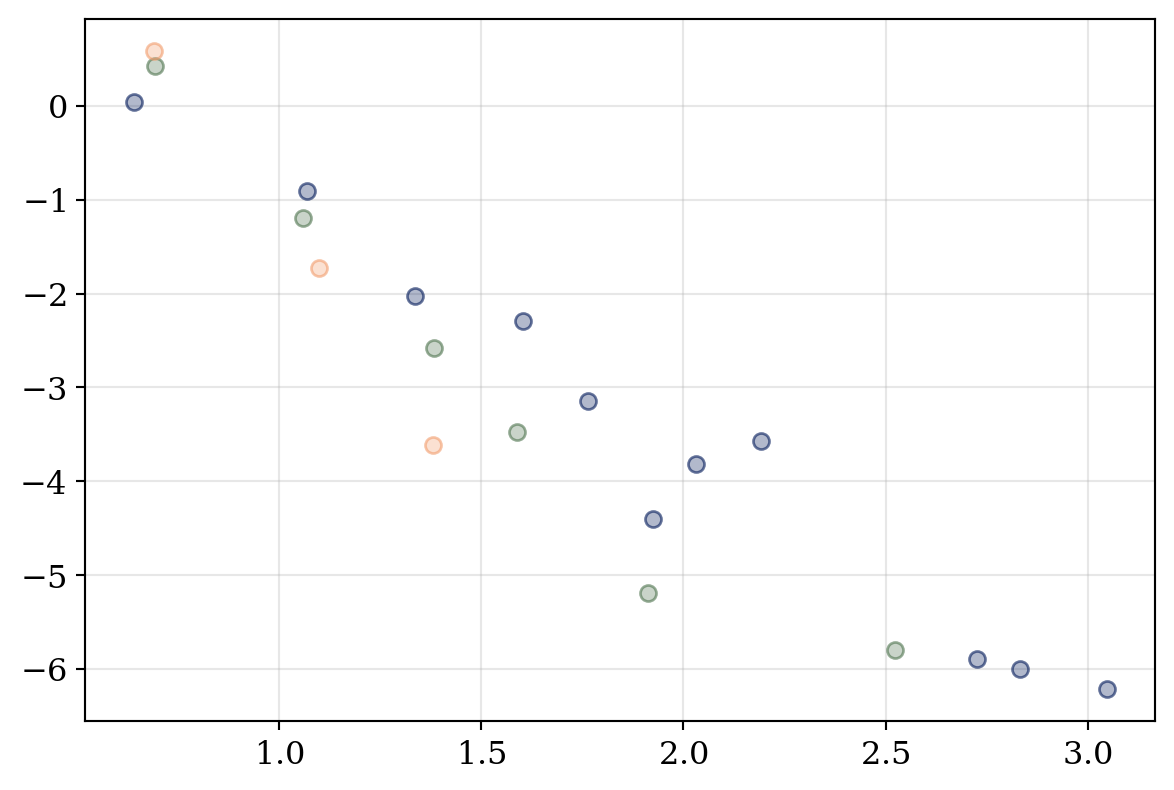

In [3]:
def dist(x, v):
    return x**(-v)


def get_colours(alpha):
    return cm.batlow(np.linspace(0, 1, 9), alpha)


plot_configs = get_plot_configs()
plot_configs["xtick.labelsize"] = 12
plot_configs["ytick.labelsize"] = 12
plt.rcParams.update(plot_configs)

fig, (axis) = plt.subplots(1, 1, figsize=(6, 4), constrained_layout=True)
axis.grid(alpha=0.3)
axis.set_axisbelow(True)
# axis.set_yscale("log"), axis.set_xscale("log")

fits = {}

for idx, f in enumerate(sorted(files)):
    labelled, _ = get_cluster_labels(f, -1)
    cluster_sizes = np.bincount(labelled.flatten())[1:]
    min_c = cluster_sizes.min()
    max_c = cluster_sizes.max()
    bin_edges = np.logspace(np.log2(min_c), np.log2(max_c), 64, base=2)
    # bin_edges = np.linspace(min_c, max_c, 64)
    counts, _ = np.histogram(cluster_sizes, bins=bin_edges, density=True)
    # cfit, _ = curve_fit(dist, bin_edges[:-1], counts)
    cfit, _ = np.polyfit(np.log(bin_edges[1:-1]), np.log(counts[1:]), 1)
    # fits[f] = cfit
    if idx % 3 == 0:
        axis.scatter(
            np.log(bin_edges[1:-1]),
            np.log(counts[1:]),
            facecolor=get_colours(0.3)[idx],
            edgecolor=get_colours(0.6)[idx],
        )
        # axis.plot(
        #     bin_edges[:-1],
        #     dist(bin_edges[:-1], fits[f][0])
        # )
print(fits.items())
plt.show()